In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

import numpy as np
import os
import PIL
import PIL.Image
import glob

import cv2

import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


2022-09-08 16:47:06.995807: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-08 16:47:07.013564: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-08 16:47:07.013706: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
x_train = []
y_train = []

x_val = []
y_val = []

count = 0

path = "chest_xray/train/NORMAL"
for image_name in os.listdir(path):
    img = cv2.imread(os.path.join(path,image_name))
    if (count % 10 == 0):
        x_val.append(img)
        y_val.append(int(0))
    else:
        x_train.append(img)
        y_train.append(int(0))
    count = count + 1

count = 0

path = "chest_xray/train/PNEUMONIA"
for image_name in os.listdir(path):

    img = cv2.imread(os.path.join(path,image_name))
    if (count % 10 == 0):
        x_val.append(img)
        y_val.append(int(1))
    else:
        x_train.append(img)
        y_train.append(int(1))
    count = count + 1



path = "chest_xray/val/NORMAL"
for image_name in os.listdir(path):
    img = cv2.imread(os.path.join(path,image_name))
    x_val.append(img)
    y_val.append(int(0))

path = "chest_xray/val/PNEUMONIA"
for image_name in os.listdir(path):
    img = cv2.imread(os.path.join(path,image_name))
    x_val.append(img)
    y_val.append(int(1))

In [4]:
# len(x_train)
len(y_train)

4693

In [5]:
# Multiply Function

def multiply(img):
    # Get the size of the image
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    #normalize between 0 & 1
    img = img.astype("float32") / 255

    # Apply the Filter
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
                # Apply Filter to seperate image. 
                img[y,x,z] = img[y,x,z] * img[y,x,z]
    
    # return Multiply image
    return img

# Screen Function

def screen(img):
    # Get the size of the image
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    #normalize between 0 & 1
    img = img.astype("float32") / 255

    # Apply the Filter
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
                # Apply Filter to seperate image. 
                img[y,x,z] = 1 - (1 - img[y,x,z]) * (1 - img[y,x,z])
    
    # return Multiply image
    return img


In [6]:
# Resize all the images to 480x480

endTrain = len(x_train)
endVal = len(x_val)

for image in range(0,endTrain):
    x_train[image] = tf.image.resize_with_pad(x_train[image],224,224)

for image in range(0,endVal):
    x_val[image] = tf.image.resize_with_pad(x_val[image],224,224)

2022-09-08 16:47:30.848063: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-08 16:47:30.848274: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-08 16:47:30.848427: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-08 16:47:31.134156: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-08 16:47:31.134302: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

(4693, 224, 224, 3)
(539, 224, 224, 3)


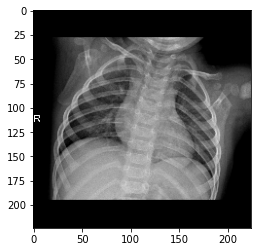

In [7]:
#  Convert to numpy array and check image

x_train = np.asarray(x_train, dtype=int)
y_train = np.asarray(y_train, dtype=int)
x_val = np.asarray(x_val, dtype=int)
y_val = np.asarray(y_val, dtype=int)

print(x_train.shape)
print(x_val.shape)
plt.imshow(x_train[0])

In [8]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))

y_val= np.asarray(y_val).astype('float32').reshape((-1,1))

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(4693, 224, 224, 3)
(4693, 1)
(539, 224, 224, 3)
(539, 1)


In [10]:
# end = len(x_train)

# x_dataAug = []
# y_dataAug = []
# for image in range(0,end):
#     x_dataAug.append(multiply(x_train[image]))
#     y_dataAug.append(y_train[image])
#     x_dataAug.append(screen(x_train[image]))
#     y_dataAug.append(y_train[image])

In [11]:
# Save the processed x_train files

# end = len(x_train)
# path = 'chest_xray/processed'
# saveImages = np.asarray(x_train)
# # saveImages = saveImages * 255
# saveImages = saveImages.astype("int64")
# for image in range(0,end):
#     cv2.imwrite(os.path.join(path, str(image) + '.jpg'),saveImages[image])

In [12]:
# pretrained_base = tf.keras.applications.vgg19.VGG19(
#     include_top=False, weights='imagenet', input_tensor=None,
#     input_shape=[224,224,3], pooling=None, classes=None,
#     classifier_activation=None
# )

In [13]:
model = tf.keras.Sequential([
   # Model Creation 
 
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same', input_shape=[224, 244, 3]),

    layers.BatchNormalization(),
    

    #Second Convolution Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Third Convolution Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    

    #Fourth Convolution Block
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Fifth Convolution Block
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    

    #Sixth Convolution Block
    layers.Conv2D(filters=2048, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Classifer Head
    layers.Flatten(),
    layers.Dropout(.4),
    layers.Dense(units=512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(units=256, activation="relu"),
    layers.Dropout(0.3),
     layers.Dense(units=128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(units=1, activation="sigmoid"),
])

In [14]:
opt = tf.optimizers.Adam(learning_rate=0.0001)

In [15]:
model.compile(
    optimizer=opt,
    loss='BinaryCrossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,y_train,
    epochs=20,
    shuffle=True,
    batch_size=16,
    validation_data=(x_val,y_val),
    verbose=1,
)

2022-09-08 16:47:45.279101: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5651423232 exceeds 10% of free system memory.
2022-09-08 16:47:48.572123: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5651423232 exceeds 10% of free system memory.


Epoch 1/20


2022-09-08 16:47:51.093626: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8303
2022-09-08 16:47:54.089689: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


294/294 [==============================] - 63s 185ms/step - loss: 4.9128 - accuracy: 0.8915 - val_loss: 33.7397 - val_accuracy: 0.7347
Epoch 2/20
294/294 [==============================] - 49s 168ms/step - loss: 3.9096 - accuracy: 0.9105 - val_loss: 2.2103 - val_accuracy: 0.9239
Epoch 3/20
294/294 [==============================] - 50s 169ms/step - loss: 2.3679 - accuracy: 0.9388 - val_loss: 3.2757 - val_accuracy: 0.9369
Epoch 4/20
294/294 [==============================] - 50s 171ms/step - loss: 2.3118 - accuracy: 0.9391 - val_loss: 0.8761 - val_accuracy: 0.9647
Epoch 5/20
294/294 [==============================] - 50s 169ms/step - loss: 1.2695 - accuracy: 0.9563 - val_loss: 1.1236 - val_accuracy: 0.9351
Epoch 6/20
294/294 [==============================] - 50s 169ms/step - loss: 1.3560 - accuracy: 0.9597 - val_loss: 1.7006 - val_accuracy: 0.9536
Epoch 7/20
294/294 [==============================] - 50s 169ms/step - loss: 0.9602 - accuracy: 0.9642 - val_loss: 0.6038 - val_accuracy: 0.